# Lab | Feature Extraction

#### For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data.

#### LAB1 - 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)



#### LAB1 - 2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df`.

In [2]:
data = pd.read_csv('W4 - D1 - we_fn_use_c_marketing_customer_value_analysis.csv') 

#### LAB1 - 3. First look at its main features (`head`, `shape`, `info`).

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### LAB1 - 4. Rename the columns so they follow the _PE8_ (snake case).

In [6]:
# data.columns

In [7]:
# data_renamed = data.rename(columns = {'Customer': 'customer', 'State': 'state', 'Customer Lifetime Value': 'customer_lifetime_value', 'Response': 'response', 'Coverage': 'coverage', 'Education': 'education', 'Effective To Date': 'effective_to_date', 'EmploymentStatus': 'employment_status', 'Gender': 'gender', 'Income': 'income', 'Location Code': 'location_code', 'Marital Status': 'marital_status', 'Monthly Premium Auto': 'monthly_premium_auto', 'Months Since Last Claim': 'months_since_last_claim', 'Months Since Policy Inception': 'months_since_policy_inception', 'Number of Open Complaints': 'number_of_open_complaints', 'Number of Policies': 'number_of_policies', 'Policy Type': 'policy_type', 'Policy': 'policy', 'Renew Offer Type': 'renew_offer_type', 'Sales Channel': 'sales_channel', 'Total Claim Amount': 'total_claim_amount', 'Vehicle Class': 'vehicle_class', 'Vehicle Size': 'vehicle_size'})
# data_renamed

In [8]:
data.columns = map(str.lower,data.columns)
data.columns = data.columns.str.replace(' ','_')

In [9]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
data = data.rename(columns = {'employmentstatus': 'employment_status'})

#### LAB1 - 5. Change effective to date column to datetime format.

In [11]:
data['effective_to_date']= pd.to_datetime(data['effective_to_date'])

In [12]:
# Checking that 'effective_to_date' has been correctly transformed.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

#### LAB 1 - 6. Check `NaN` values per column.

In [13]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [14]:
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)
# There don't seem to be any null values.

,column_name,Percentage Null Values
0,customer,0.0
1,state,0.0
22,vehicle_class,0.0
21,total_claim_amount,0.0
20,sales_channel,0.0
19,renew_offer_type,0.0
18,policy,0.0
17,policy_type,0.0
16,number_of_policies,0.0
15,number_of_open_complaints,0.0


#### LAB1 - 7. Define a function that differentiates between continuous and discrete variables. **Hint**: A number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.

#### Discrete variable
Discrete variables are numeric variables that have a countable number of values between any two values. A discrete variable is always numeric. For example, the number of customer complaints or the number of flaws or defects.
#### Continuous variable
Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payment is received.

In [15]:
data.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employment_status                   5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [16]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [18]:
#data_cat = data.select_dtypes(include=[np.object])
#discrete_df = data.select_dtypes(include=[np.int64])
#continuous_df = data.select_dtypes(include=['datetime64', 'float64'])

## LAB2 - 2. Load the continuous and discrete variables into `continuous_df` and `discrete_df` variables.

In [19]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [20]:
numerical_df = data.select_dtypes(include=['int64', 'float64', 'datetime64'])
numerical_df.columns

Index(['customer_lifetime_value', 'effective_to_date', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

In [21]:
category_df = data.select_dtypes(include=[np.object])
#df1 = df[['a', 'b']]
continuous_df = data[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']]
discrete_df = data[['effective_to_date', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']]

In [22]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


In [23]:
discrete_df.head()

,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2011-02-24,32,5,0,1
1,2011-01-31,13,42,0,8
2,2011-02-19,18,38,0,2
3,2011-01-20,18,65,0,7
4,2011-02-03,12,44,0,1


## LAB2 - 3. Plot a correlation matrix, what can you see?

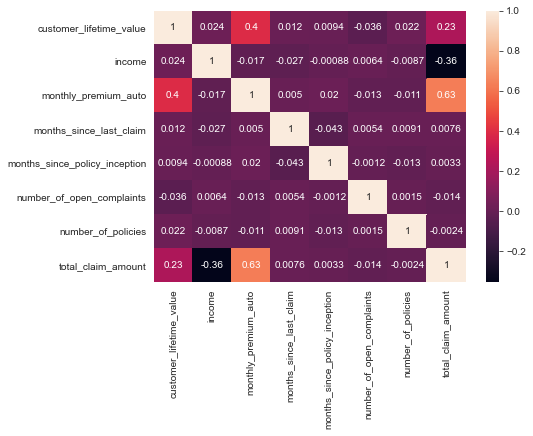

In [24]:
corr_matrix=numerical_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

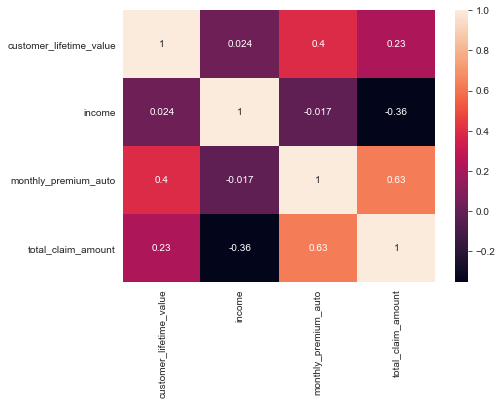

In [25]:
corr_matrix=continuous_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

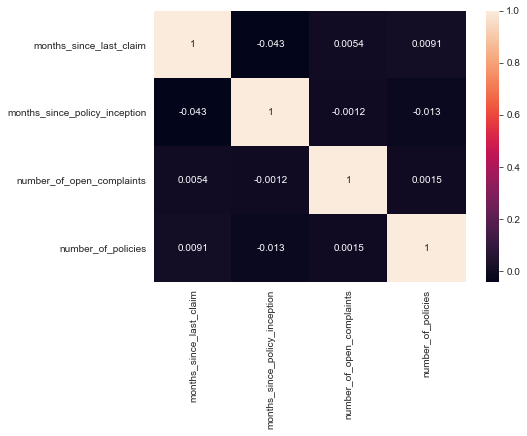

In [26]:
corr_matrix=discrete_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

##### LAB2 - 3 - Discrete variables don't have any correlation between them, whereas continuous variables have some correlation between them.

## LAB2 - 4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

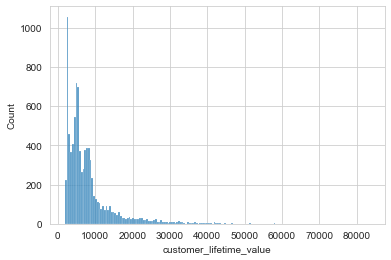

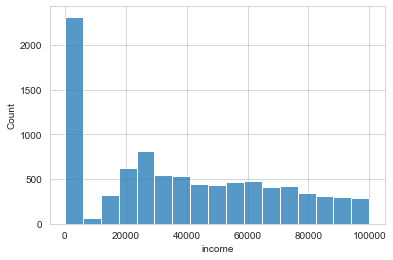

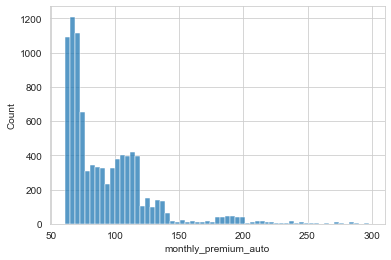

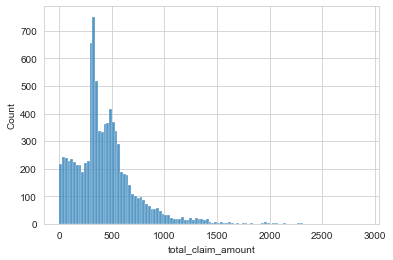

In [27]:
# Histplot for continuous variables.
for i in continuous_df.columns:
    sns.histplot(continuous_df[i])
    plt.show()

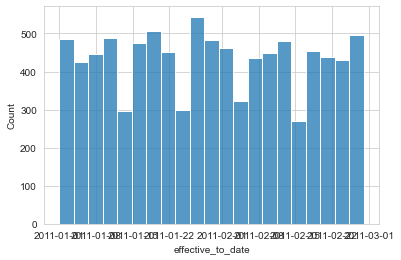

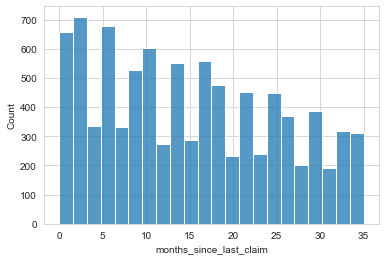

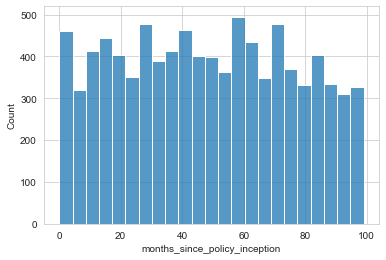

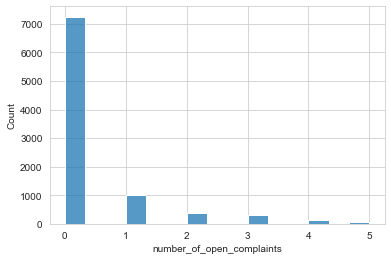

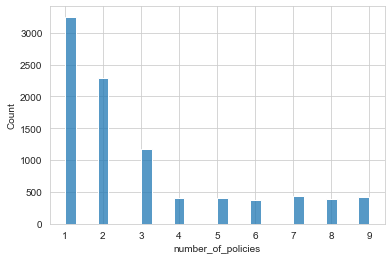

In [28]:
for i in discrete_df.columns:
    sns.histplot(discrete_df[i])
    plt.show()

## LAB2 - 5. What can you see in the plots?

##### number_of_open_complaints and number_of_policies show an exponential decay, a log transformation might make sense for these columns.
##### income shows a high amount of 0's, it might make sense to divide the database between employed and unemployed.
##### customer_lifetime_value, monthly_premium_auto, total_claim_amount show a gaussian-like shape, with some skewness.

## LAB2 - 6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

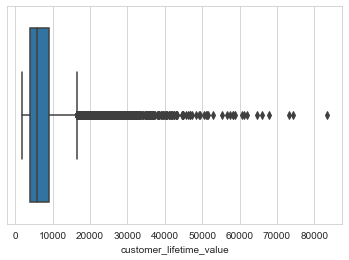

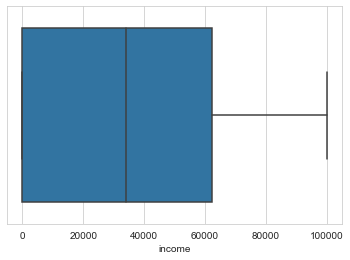

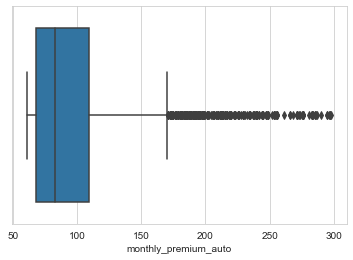

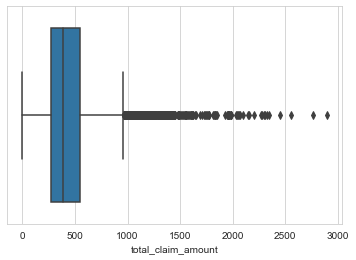

In [29]:
# Boxplot to find outliers.
for i in continuous_df.columns:
    sns.boxplot(continuous_df[i])
    plt.show()

## LAB2 - 7. Have you found outliers? If you have, what should we do with them?

In [30]:
# I first check how many outliers there really are compared to the total amount of values.

In [31]:
iqr = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at: 16414.04
The number of points outise the upper wisker is:  817


In [32]:
len(continuous_df['customer_lifetime_value'])

9134

In [33]:
iqr = np.percentile(continuous_df['monthly_premium_auto'],75) - np.percentile(continuous_df['monthly_premium_auto'],25)
upper_limit = np.percentile(continuous_df['monthly_premium_auto'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = continuous_df[continuous_df['monthly_premium_auto'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at: 170.50
The number of points outise the upper wisker is:  430


In [34]:
iqr = np.percentile(continuous_df['total_claim_amount'],75) - np.percentile(continuous_df['total_claim_amount'],25)
upper_limit = np.percentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = continuous_df[continuous_df['total_claim_amount'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at: 960.40
The number of points outise the upper wisker is:  453


In [35]:
# The column with the most outliers has less than 10% of outliers. 
# The outliers are relatively continuous, there aren't unique outliers, so I will avoit dropping them.

#### LAB1 - 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. **Hint**: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [36]:
category_df.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [37]:
category_df['customer'].value_counts()

XY36764    1
RR93140    1
PL54420    1
AJ32539    1
JX27737    1
          ..
TE61015    1
EQ82942    1
LC77957    1
OL48469    1
OT47603    1
Name: customer, Length: 9134, dtype: int64

In [38]:
category_df['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [39]:
category_df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [40]:
category_df['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [41]:
category_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [42]:
category_df['employment_status'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

In [43]:
category_df['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [44]:
category_df['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [45]:
category_df['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [46]:
category_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [47]:
category_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [48]:
category_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [49]:
category_df['sales_channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [50]:
category_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [51]:
category_df['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

#### LAB1 - 9. Get categorical features.

In [52]:
dummy_data = pd.get_dummies(category_df, columns=['state', 'response', 'coverage', 'education', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],drop_first=True)
dummy_data.head()

,customer,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,BU79786,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,QZ44356,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,AI49188,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,WW63253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,HB64268,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### LAB1 - 10. What should we do with the `customer_id` column?

In [53]:
# Transform to index.

In [54]:
concat_data = pd.concat([dummy_data, discrete_df, continuous_df], axis=1)
concat_data.head()

,customer,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,BU79786,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2011-02-24,32,5,0,1,2763.519279,56274,69,384.811147
1,QZ44356,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2011-01-31,13,42,0,8,6979.535903,0,94,1131.464935
2,AI49188,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2011-02-19,18,38,0,2,12887.431650,48767,108,566.472247
3,WW63253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2011-01-20,18,65,0,7,7645.861827,0,106,529.881344
4,HB64268,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2011-02-03,12,44,0,1,2813.692575,43836,73,138.130879


In [55]:
data_index = concat_data.set_index(concat_data['customer'])

data_index = data_index.drop(['customer'], axis=1)

In [56]:
data_index.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2011-02-24,32,5,0,1,2763.519279,56274,69,384.811147
QZ44356,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2011-01-31,13,42,0,8,6979.535903,0,94,1131.464935
AI49188,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2011-02-19,18,38,0,2,12887.431650,48767,108,566.472247
WW63253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2011-01-20,18,65,0,7,7645.861827,0,106,529.881344
HB64268,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2011-02-03,12,44,0,1,2813.692575,43836,73,138.130879


### ••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••

### W4 - D2
# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?



### 1. Get categorical variables

In [57]:
category_df.reset_index
category_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Plot categorical variables

In [58]:
# I drop customer:

category_df_drop = category_df.drop(['customer'], axis=1)
category_df_drop.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [59]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

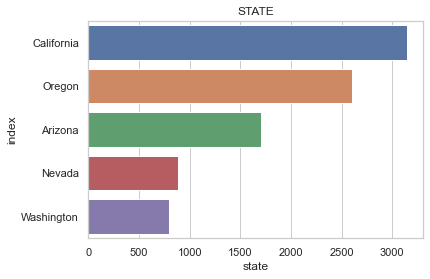

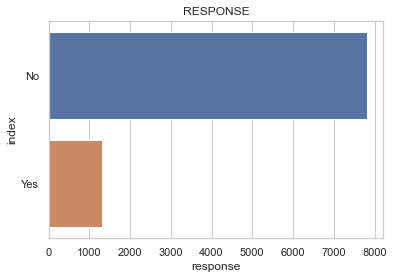

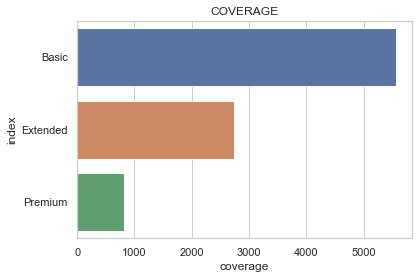

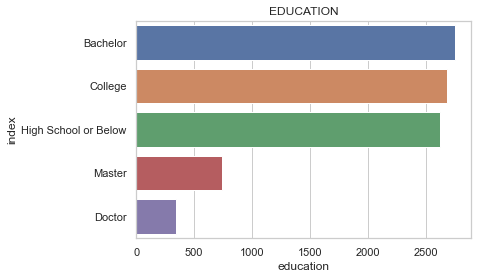

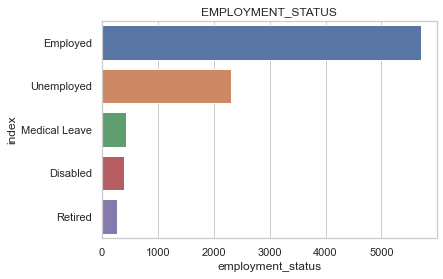

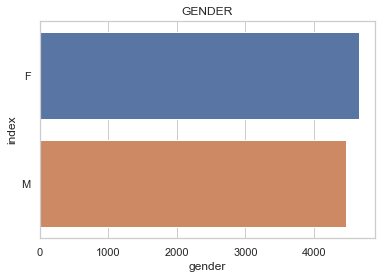

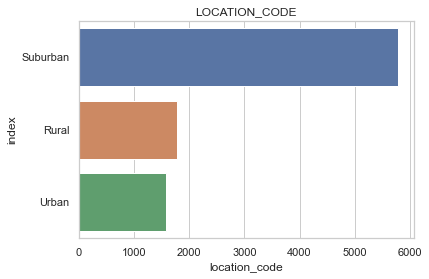

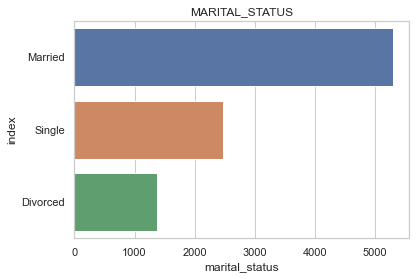

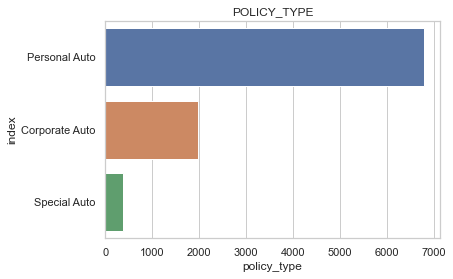

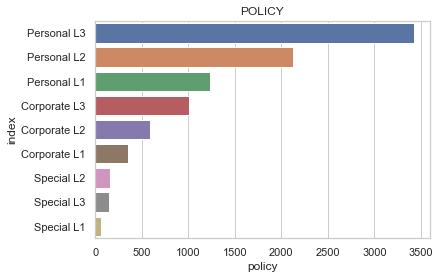

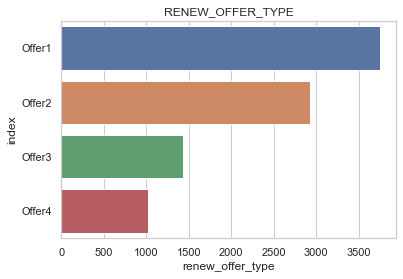

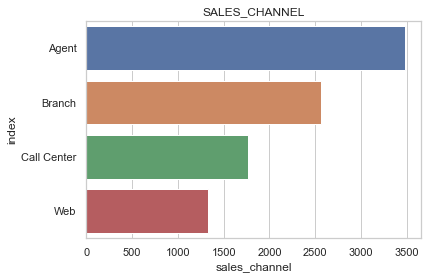

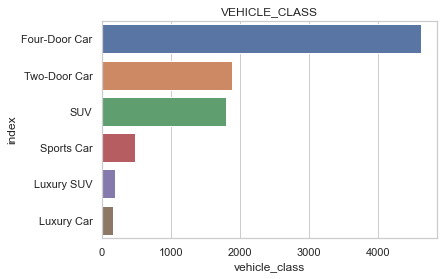

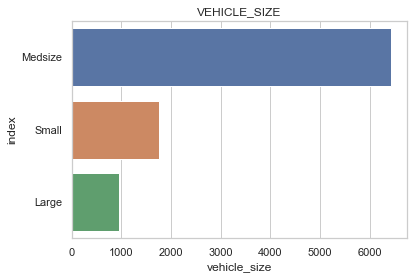

<Figure size 432x288 with 0 Axes>

In [60]:
def cat_plotter(df):
    cols_cat = list(df.select_dtypes(include=['object']).columns)
    for col in cols_cat:
        my_data = df[col].value_counts().reset_index()
        ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
        plt.figure()
    
cat_plotter(category_df_drop)

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [61]:
category_df_drop.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [62]:
for col in category_df_drop:
        my_data = category_df_drop[col].value_counts()
        print(my_data)

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595

In [63]:
# Employment_status - It might be possible to divide the dataframe between employed and the othre options
# Gender is equally represented, it would make sense to drop the column.

### 4. Plot time variable. Can you extract something from it?

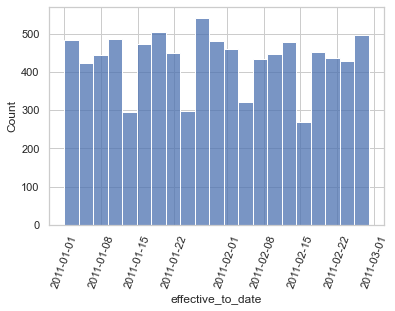

In [79]:
chart = sns.histplot(discrete_df['effective_to_date'])
plt.xticks(rotation=70)
plt.show()

In [ ]:
# There is a regular monthly pattern, but it's not showing any significant trends.